In [ ]:
!pip install flask-ngrok
!pip install tensorflow==1.12.0
!pip install torch==1.2.0
!pip install torchvision==0.2.0

     |████████████████████████████████| 83.1MB 69kB/s 
     |████████████████████████████████| 3.1MB 40.9MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0
     |████████████████████████████████| 748.9MB 21kB/s 
ERROR: torchvision 0.8.1+cu101 has requirement torch==1.7.0, but you'll have torch 1.2.0 which is incompatible.
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
     |████████████████████████████████| 51kB 2.9MB/s 
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101


In [ ]:
from flask_ngrok import run_with_ngrok

In [ ]:
!git clone https://github.com/GrayXu/Virtual-Try-On-Flask
!mv /content/Virtual-Try-On-Flask/* /content/

Cloning into 'Virtual-Try-On-Flask'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 67 (delta 29), reused 41 (delta 12), pack-reused 0
Unpacking objects: 100% (67/67), done.


In [ ]:
!gdown --id 1kV9Xf9tDaqH_-2ZDBA6-_lMg8_FmvE1t

Downloading...
From: https://drive.google.com/uc?id=1kV9Xf9tDaqH_-2ZDBA6-_lMg8_FmvE1t
To: /content/checkpoints.zip
603MB [00:06, 88.3MB/s]


In [ ]:
!rm -r /content/checkpoints/
!rm -r /content/sample_data

In [ ]:
from zipfile import ZipFile

with ZipFile('/content/checkpoints.zip') as fileobj:
    fileobj.extractall()

In [ ]:
!rm -r templates
!mkdir templates
!mv index.html ./templates
!mv script.js ./templates
!mv style.css ./templates
!mv result.html ./templates

In [ ]:
from Model import Model
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import time
import cv2

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

%matplotlib inline

In [ ]:
model = Model("/content/checkpoints/jpp.pb",
              "/content/checkpoints/gmm.pth", 
              "/content/checkpoints/tom.pth",use_cuda = False)

Instructions for updating:
Use tf.gfile.GFile.
initialization method [normal]
initialization method [normal]
use_cuda = False


In [ ]:
!wget https://raw.githubusercontent.com/GrayXu/Online-Storage/master/img/20200118004320.png
!wget https://raw.githubusercontent.com/GrayXu/Online-Storage/master/img/20200118004342.png

--2020-11-25 15:04:38--  https://raw.githubusercontent.com/GrayXu/Online-Storage/master/img/20200118004320.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37163 (36K) [image/png]
Saving to: ‘20200118004320.png’

20200118004320.png  100%[===================>]  36.29K  --.-KB/s    in 0.003s  

2020-11-25 15:04:38 (11.7 MB/s) - ‘20200118004320.png’ saved [37163/37163]

--2020-11-25 15:04:39--  https://raw.githubusercontent.com/GrayXu/Online-Storage/master/img/20200118004342.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30748 (30K) [i

(256, 192, 3)

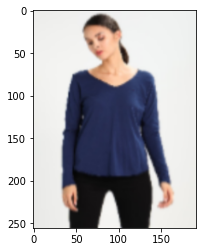

In [ ]:
img = Image.open("/content/20200118004320.png")
img = img.resize((192,256))
plt.imshow(img)
img = np.array(img)
img.shape

(256, 192, 3)

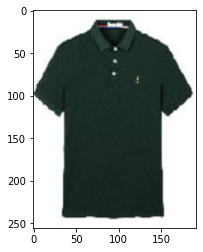

In [ ]:
c_img = Image.open("/content/20200118004342.png")
c_img = c_img.resize((192,256))
plt.imshow(c_img)
c_img = np.array(c_img)
c_img.shape

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2479: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


time:107.67173051834106
Confidence0.3962254002690315


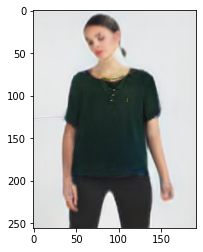

In [ ]:
start = time.time()
result,trusts = model.predict(img, c_img, need_pre=False,check_dirty=True)
if result is not None:
    end = time.time()
    print("time:"+str(end-start))
    print("Confidence"+str(trusts))
    plt.imshow(result)

In [ ]:
from flask import Flask, flash, request, redirect, render_template
from werkzeug.utils import secure_filename
ALLOWED_EXTENSIONS = set(['jpg', 'png','jpeg'])
from flask import Flask
import os
UPLOAD_FOLDER = './'

app = Flask(__name__,template_folder='./templates',static_folder='./templates')
app.secret_key = "secret key"
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER
def allowed_file(filename):
    return '.' in filename and filename.rsplit('.', 1)[1].lower() in ALLOWED_EXTENSIONS

@app.route('/')
def upload_form():
    return render_template('index.html')

@app.route('/result/')
def result_template():
    return render_template('result.html')

@app.route('/result/', methods=['POST'])
def redir():
    return redirect('/')

@app.route('/', methods=['POST'])
def upload_file():
        if request.method == 'POST':
                print(request.__dict__)
                print(request.files)
                if 'modelfile' in request.files:
                    res = request.files['modelfile']
                    print(res)
                    img = Image.open(res)
                    print(img)
                    img.save('model.png')
                    return redirect('/')
                elif 'clothfile' in request.files:
                    res = request.files['clothfile']
                    print(res)
                    img = Image.open(res)
                    print(img)
                    img.save('cloth.png')
                    return redirect('/')
                else: 
                    if os.path.isfile("/content/model.png"):
                        img = Image.open("/content/model.png")
                        img = img.resize((192,256))
                        img = np.array(img)
                    else:
                        flash('No model image Found')
                        return redirect(request.url)
                    if os.path.isfile('/content/cloth.png'):
                        c_img = Image.open("/content/cloth.png")
                        c_img = c_img.resize((192,256))
                        c_img = np.array(c_img)
                    else:
                        flash('No cloth image Found')
                        return redirect(request.url)
                    result,trusts = model.predict(img, c_img, need_pre=False,check_dirty=True)
                    result = Image.fromarray(result)
                    result.save('./templates/final.png')
                    return redirect('/result/')
        # check if the post request has the file part
                # if 'sfile' not in request.files:
                #         flash('No file part')
                #         return redirect(request.url)
                # file = request.files['sfile']   
                # print(file.filename)
                # if file.filename == '':
                #         flash('No file selected for uploading')
                #         return redirect(request.url)
                # if file and allowed_file(file.filename):
                #         filename = secure_filename(file.filename)
                #         if 'ssubmit' in request.form:
                #             file.save(os.path.join(app.config['UPLOAD_FOLDER'], 'model.jpg'))
                #             flash('Model image successfully uploaded')
                #         else:
                #             file.save(os.path.join(app.config['UPLOAD_FOLDER'], 'cloth.jpg'))
                #             flash('Cloth image successfully uploaded')
                #         return redirect('/')
                # else:
                #         flash('Allowed file types are jpg,jpeg,png')
                #         return redirect(request.url)
# @app.route('/',methods=['GET'])
# def model():
#     img = Image.open("/content/model.png")
#     img = img.resize((192,256))
#     img = np.array(img)
#     c_img = Image.open("/content/cloth.png")
#     c_img = c_img.resize((192,256))
#     c_img = np.array(c_img)
#     result,trusts = model.predict(img, c_img, need_pre=False,check_dirty=True)
#     result = Image.fromarray(result)
#     result.save('final.png')
#     return redirect('/')
# app = Flask(__name__)
run_with_ngrok(app)   #starts ngrok when the app is run
# @app.route("/")
# def home():
#     return "<h1>Running Flask on Google Colab!</h1>"
  
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://5f4143d7a1e8.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [25/Nov/2020 15:37:36] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [25/Nov/2020 15:37:36] "GET /templates/style.css HTTP/1.1" 200 -
127.0.0.1 - - [25/Nov/2020 15:37:37] "GET /templates/script.js HTTP/1.1" 200 -
127.0.0.1 - - [25/Nov/2020 15:37:38] "GET /favicon.ico HTTP/1.1" 404 -


In [ ]:
!ls

cloth.jpg  model.jpg  sample_data  templates


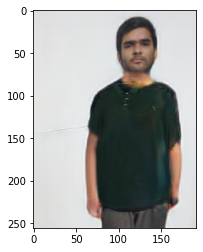

In [ ]:
plt.imshow(Image.open('/content/templates/final.png'))

In [ ]:
result = Image.fromarray(result)
result.save('./templates/final.png')